# Clustering : K-Means 

loading and visualizing dataset

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [24]:
df=pd.read_csv(r"C:\Users\kulso\OneDrive\Desktop\Internship\Task8\Mall_Customers.csv")

In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
# dropping non num and irrelevent col
X= df[['Annual Income (k$)','Spending Score (1-100)']]

In [27]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

Elbow method to find optimal k

In [28]:
inertia=[]
k_range=range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state =42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


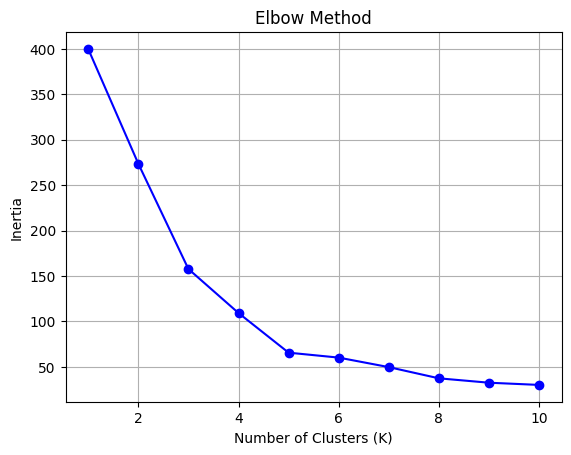

In [29]:
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

from the graph we see that optimal k=5 
but we can also use the below library and code to find out optimal k 

In [30]:
from kneed import KneeLocator
kl = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
print(f"Optimal K: {kl.elbow}")


Optimal K: 5


Choosing optimal k and fit model

In [31]:
op_k=5
kmeans = KMeans(n_clusters=op_k,random_state=42)
labels=kmeans.fit_predict(X_scaled)

In [32]:
#adding cluster label to dataset for visualization 

In [33]:
df['Cluster']=labels

Visualizing clusteres 

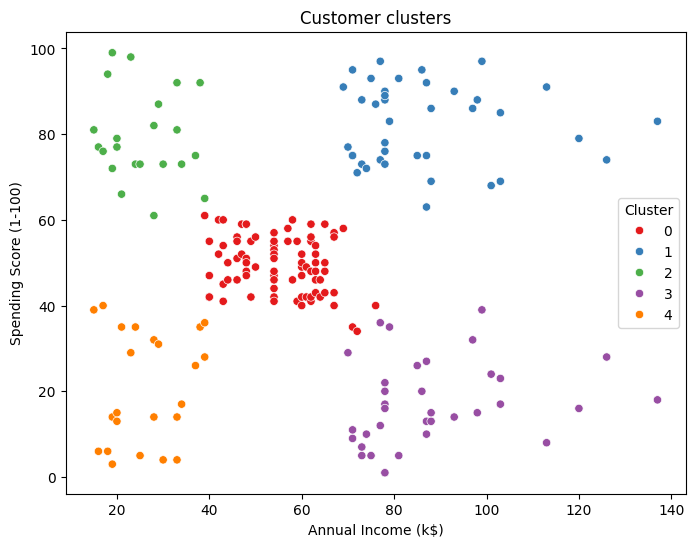

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',data=df, palette='Set1')
plt.title("Customer clusters")
plt.show()

PCA for 2D

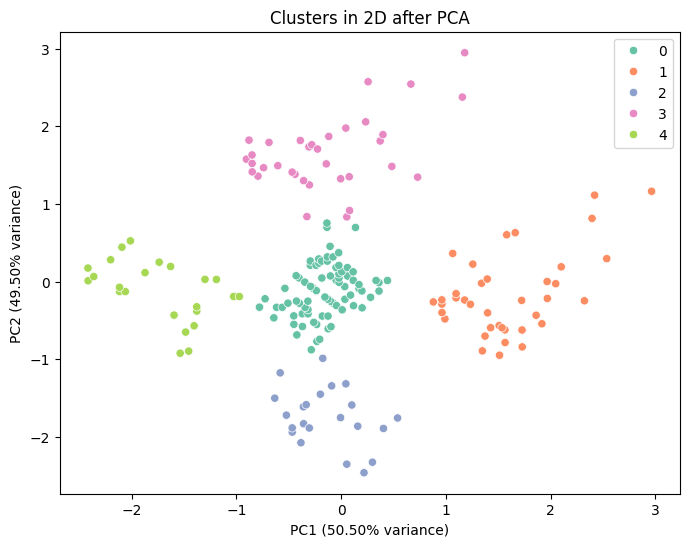

In [35]:
# pca
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=labels,palette="Set2")
expl_var = pca.explained_variance_ratio_
plt.xlabel(f"PC1 ({expl_var[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({expl_var[1]*100:.2f}% variance)")
plt.title("Clusters in 2D after PCA")
plt.show()

Evaluating using Silhouette score

In [36]:
score = silhouette_score(X_scaled,labels)
print(f"Silhouette Score:{score:.2f}")

Silhouette Score:0.55
